# Imports

In [ ]:
import pandas as pd
import seaborn as sns

# Reading the Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/fabagaipo/cmsc173ml/main/datasets/abalone19.dat'
df = pd.read_csv(url)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,negative
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,negative
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,negative
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,negative
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,negative


In [ ]:
df.shape

(4174, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   object 
 1   Length          4174 non-null   float64
 2   Diameter        4174 non-null   float64
 3   Height          4174 non-null   float64
 4   Whole_weight    4174 non-null   float64
 5   Shucked_weight  4174 non-null   float64
 6   Viscera_weight  4174 non-null   float64
 7   Shell_weight    4174 non-null   float64
 8   Class           4174 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.6+ KB


In [ ]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Length,1.000000,0.986790,0.827356,0.925211,0.897873,0.902901,0.897575
Diameter,0.986790,1.000000,0.833500,0.925423,0.893138,0.899618,0.905226
Height,0.827356,0.833500,1.000000,0.819086,0.774823,0.798103,0.817165
Whole_weight,0.925211,0.925423,0.819086,1.000000,0.969352,0.966352,0.955298
Shucked_weight,0.897873,0.893138,0.774823,0.969352,1.000000,0.931923,0.882457
Viscera_weight,0.902901,0.899618,0.798103,0.966352,0.931923,1.000000,0.907522
Shell_weight,0.897575,0.905226,0.817165,0.955298,0.882457,0.907522,1.000000


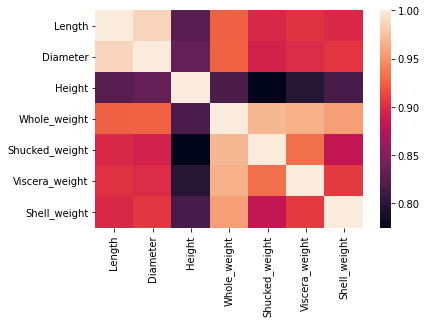

In [ ]:
sns.heatmap(df.corr())

# Cleaning the Dataset

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Class             0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df['Class'].value_counts()

negative    4142
positive      32
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


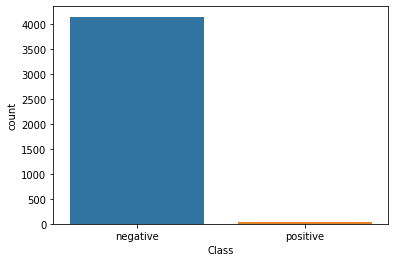

In [ ]:
sns.countplot(df['Class'])

In [ ]:
df['Class'] = df['Class'].map(lambda x: 0 if x == 'negative' else 1)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4169,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,0,0,1
4170,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0,0
4171,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4172,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1


# Splitting data

In [ ]:
X = df.drop(["Class"], axis=1)
y = df.Class
test_size = 0.2     # 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=888)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3339, 9), (835, 9), (3339,), (835,))

# Model Evaluation with Imbalanced Dataset

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# model = LogisticRegression(multi_class='ovr', solver='liblinear')
model = KNeighborsClassifier()

In [ ]:
y_train.value_counts()

0    3313
1      26
Name: Class, dtype: int64

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_original = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy_original))

Accuracy: 0.993%


In [ ]:
report_original = classification_report(y_test, y_pred)
print(report_original)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       829
           1       0.00      0.00      0.00         6

    accuracy                           0.99       835
   macro avg       0.50      0.50      0.50       835
weighted avg       0.99      0.99      0.99       835



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


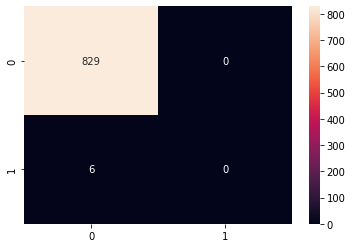

In [ ]:
confusionMatrix_original = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_original, annot=True, fmt=".0f")

# Handling Imbalanced Dataset

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


---
- Undersampling Method

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

0    26
1    26
Name: Class, dtype: int64

In [ ]:
model.fit(X_resampled_under, y_resampled_under)
y_pred_under = model.predict(X_test)

In [ ]:
accuracy_under = accuracy_score(y_test, y_pred_under)
print("Accuracy: %.3f%%" % (accuracy_under))

Accuracy: 0.525%


In [ ]:
report_under = classification_report(y_test, y_pred_under)
print(report_under)

              precision    recall  f1-score   support

           0       1.00      0.52      0.69       829
           1       0.01      1.00      0.03         6

    accuracy                           0.52       835
   macro avg       0.51      0.76      0.36       835
weighted avg       0.99      0.52      0.68       835



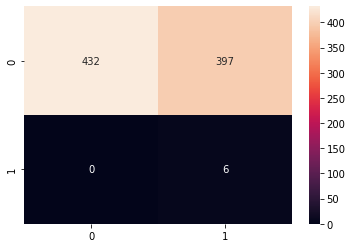

In [ ]:
confusionMatrix_under = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_under, annot=True, fmt=".0f")

---
- Oversampling Method

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled_over, y_resampled_over = ros.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

0    3313
1    3313
Name: Class, dtype: int64

In [ ]:
model.fit(X_resampled_over, y_resampled_over)
y_pred_over = model.predict(X_test)

In [ ]:
accuracy_over = accuracy_score(y_test, y_pred_over)
print("Accuracy: %.3f%%" % (accuracy_over))

Accuracy: 0.960%


In [ ]:
report_over = classification_report(y_test, y_pred_over)
print(report_over)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       829
           1       0.00      0.00      0.00         6

    accuracy                           0.96       835
   macro avg       0.50      0.48      0.49       835
weighted avg       0.99      0.96      0.97       835



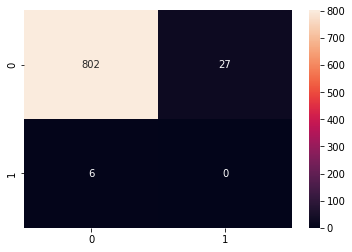

In [ ]:
confusionMatrix_over = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusionMatrix_over, annot=True, fmt=".0f")

# Evaluation

Doing model evaluation with the imbalanced dataset, we can see the accuracy at 99% making the result be unreliable and misleading, leading it to have an accuracy pitfall. Does this mean our model is running correctly? No, it just shows how uneven our dataset really is. This is the definition of imbalanced datasets. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class. As can be seen in the report for the original dataset, the metrics of class = 1 are low. Although our model has a high accuracy, the accuracy only reflects that of class = 0. The model on the original dataset can predict with 0.60 accuracies, but when we look at the Confusion Matrix, the rate of false predictions in class=0 is quite high. Actually, the model correctly predicts the negative class with 0.99 accuracies. Because our dataset is an imbalanced dataset

After handling our imbalanced dataset with the methods of oversampling and undersampling, we see the accuracy drop down from the results of the original dataset (undersampling = 63% and oversampling = 80%). This is a significance decrease from that of the original report. According to the model, the prediction of the negative abalone class (class = 0) has decreased, but there is also an increase in the recall metric of class = 1 or the positive abalone class, which means that the rate of predicting class = 1 of the model increased.